<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/planets_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *

In [2]:
path = untar_data(URLs.PLANET_TINY)
path.ls()

[PosixPath('/root/.fastai/data/planet_tiny/train'),
 PosixPath('/root/.fastai/data/planet_tiny/labels.csv')]

In [0]:
df = pd.read_csv(path/'labels.csv')

In [10]:
(path/'train').ls()[:3]

[PosixPath('/root/.fastai/data/planet_tiny/train/train_30337.jpg'),
 PosixPath('/root/.fastai/data/planet_tiny/train/train_3215.jpg'),
 PosixPath('/root/.fastai/data/planet_tiny/train/train_28824.jpg')]

In [4]:
df.head()

,image_name,tags
0,train_31112,clear primary
1,train_4300,partly_cloudy primary water
2,train_39539,clear primary water
3,train_12498,agriculture clear primary road
4,train_9320,clear primary


In [0]:
tfms = get_transforms(max_lighting=0.1, flip_vert=True, max_zoom=0.1, max_warp=0.1)

In [0]:
img = open_image(path/'train'/'train_31112.jpg')

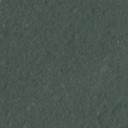

In [7]:
img

In [8]:
img.size[0]

128

In [0]:
src_size = img.size[0]//2

In [0]:
src = ImageList.from_csv(path, 'labels.csv', suffix = '.jpg', folder = 'train').split_by_rand_pct().label_from_df(label_delim = ' ')

In [24]:
src

LabelLists;

Train: LabelList (160 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;primary,partly_cloudy;primary;water,agriculture;clear;primary;road,agriculture;clear;cultivation;primary;road,cloudy
Path: /root/.fastai/data/planet_tiny;

Valid: LabelList (40 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;primary,agriculture;habitation;partly_cloudy;primary;road,clear;primary,agriculture;clear;primary;road,partly_cloudy;primary
Path: /root/.fastai/data/planet_tiny;

Test: None

In [34]:
src_size

64

In [0]:
data = src.transform(tfms, size = src_size).databunch().normalize(imagenet_stats)

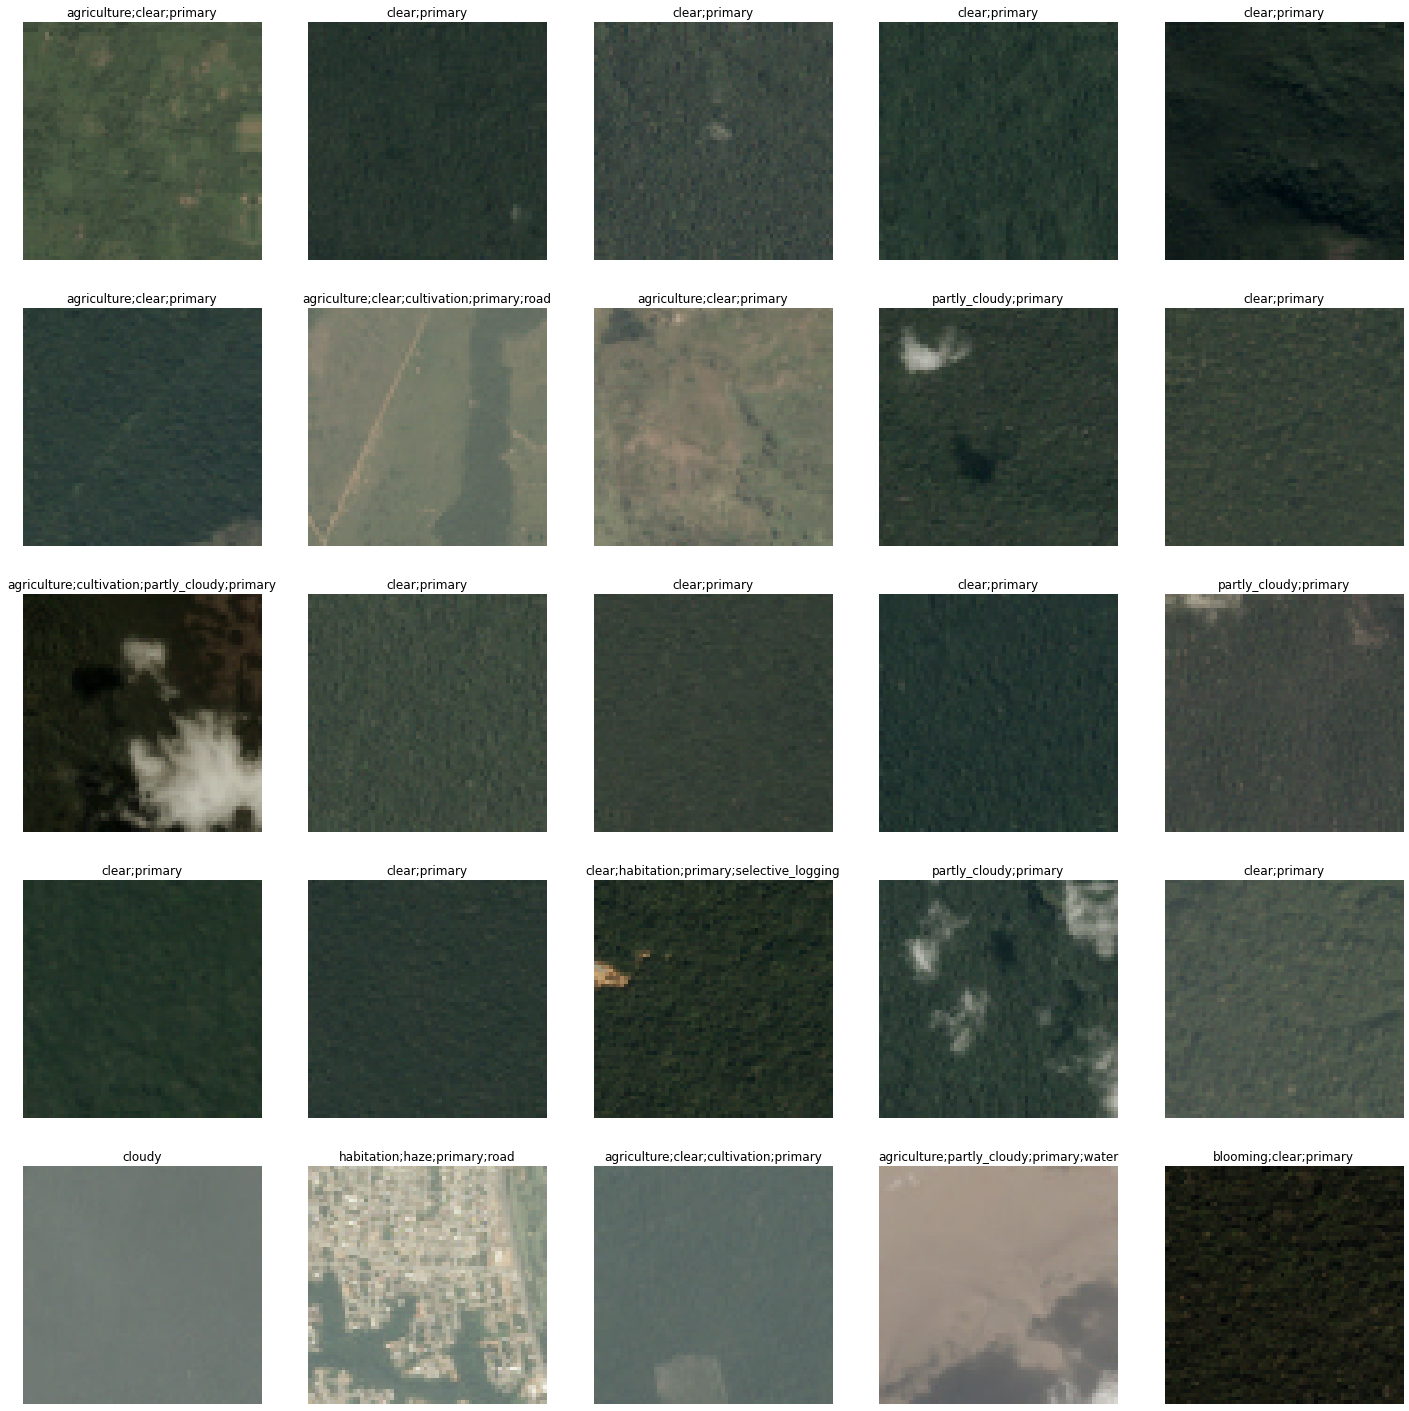

In [27]:
data.show_batch()

In [0]:
acc_02 = partial(accuracy_thresh, thresh = 0.2)
f_02 = partial(fbeta, thresh = 0.2)
metrics = [acc_02, f_02]

In [0]:
learn = cnn_learner(data, models.resnet34, metrics = metrics)

In [44]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


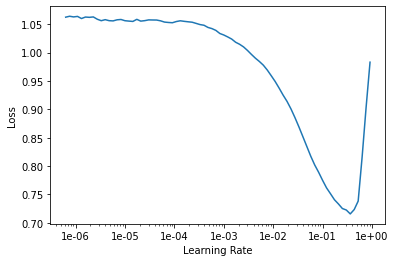

In [45]:
learn.recorder.plot()

In [0]:
lrs = slice(8e-02)

In [47]:
learn.fit_one_cycle(5, lrs)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.994071,2.489735,0.401786,0.618135,00:00
1,0.994969,5.079516,0.675000,0.655830,00:00
2,0.880930,2.364918,0.725000,0.698241,00:00
3,0.752807,1.651884,0.850000,0.707225,00:00
4,0.675299,1.339751,0.866072,0.711578,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


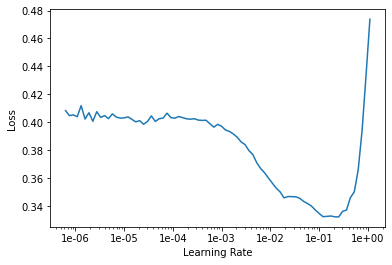

In [48]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()
lrs = slice(1e-5, 1e-01)

In [55]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (160 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: MultiCategoryList
clear;primary,partly_cloudy;primary;water,agriculture;clear;primary;road,agriculture;clear;cultivation;primary;road,cloudy
Path: /root/.fastai/data/planet_tiny;

Valid: LabelList (40 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: MultiCategoryList
clear;primary,agriculture;habitation;partly_cloudy;primary;road,clear;primary,agriculture;clear;primary;road,partly_cloudy;primary
Path: /root/.fastai/data/planet_tiny;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=Fals

In [57]:
learn.fit_one_cycle(8, lrs)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.407044,0.733544,0.876786,0.760100,00:00
1,0.400130,1.630985,0.837500,0.716030,00:00
2,0.432509,4.138561,0.866072,0.648920,00:00
3,0.405562,4.903422,0.858929,0.702521,00:00
4,0.391228,2.546499,0.866072,0.734482,00:00
5,0.375266,1.379794,0.860714,0.762571,00:00
6,0.358011,1.097826,0.867857,0.791659,00:00
7,0.338820,0.977142,0.882143,0.808530,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


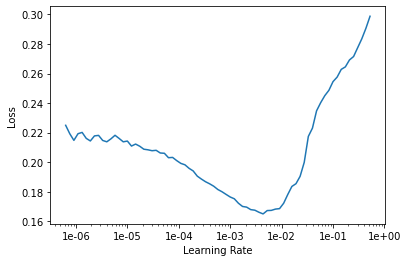

In [58]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.save('stage-2')

In [0]:
flr = 8e-02
lrs = slice(1e-03, flr/5)

In [62]:
(8e-2)*0.2

0.016

In [64]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (160 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: MultiCategoryList
clear;primary,partly_cloudy;primary;water,agriculture;clear;primary;road,agriculture;clear;cultivation;primary;road,cloudy
Path: /root/.fastai/data/planet_tiny;

Valid: LabelList (40 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: MultiCategoryList
clear;primary,agriculture;habitation;partly_cloudy;primary;road,clear;primary,agriculture;clear;primary;road,partly_cloudy;primary
Path: /root/.fastai/data/planet_tiny;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=Fals

In [65]:
learn.fit_one_cycle(5, lrs)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.194255,0.925684,0.869643,0.778229,00:00
1,0.202424,0.884607,0.846429,0.716717,00:00
2,0.231332,5.761629,0.805357,0.640497,00:00
3,0.226484,7.355174,0.833929,0.685255,00:00
4,0.222856,3.544560,0.846429,0.729123,00:00


In [67]:
learn.fit_one_cycle(3, lrs)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.169019,1.465766,0.864286,0.749489,00:00
1,0.178953,1.000994,0.862500,0.695703,00:00
2,0.181420,0.714605,0.875000,0.738411,00:00


In [0]:
src_size = img.size[0]
new_data = src.transform(tfms, size=src_size).databunch().normalize(imagenet_stats)

In [0]:
learn.data = new_data

In [72]:
new_data.train_ds[0][0].shape

torch.Size([3, 128, 128])

In [0]:
learn.save('stage-3')

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


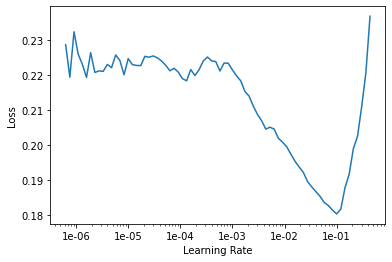

In [75]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lrs = slice(1e-02)

In [76]:
learn.fit_one_cycle(5, lrs)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.241080,0.771660,0.869643,0.726222,00:01
1,0.237156,0.637221,0.883929,0.772333,00:00
2,0.221433,0.588319,0.894643,0.792748,00:00
3,0.208683,0.509577,0.889286,0.803219,00:00
4,0.193993,0.484199,0.896429,0.816221,00:00


In [0]:
learn.save('stage-4')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


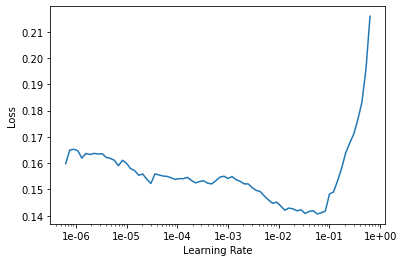

In [78]:
learn.lr_find()
learn.recorder.plot()

In [89]:
(1e-02)/5

0.002

In [88]:
learn.load('stage-4')

Learner(data=ImageDataBunch;

Train: LabelList (160 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;primary,partly_cloudy;primary;water,agriculture;clear;primary;road,agriculture;clear;cultivation;primary;road,cloudy
Path: /root/.fastai/data/planet_tiny;

Valid: LabelList (40 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;primary,agriculture;habitation;partly_cloudy;primary;road,clear;primary,agriculture;clear;primary;road,partly_cloudy;primary
Path: /root/.fastai/data/planet_tiny;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilati

In [81]:
learn.unfreeze()
learn.fit_one_cycle(8, slice(1e-05, 1e-02))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.143671,0.459975,0.900000,0.824482,00:00
1,0.141901,0.573744,0.901786,0.823248,00:00
2,0.149441,1.255203,0.892857,0.777379,00:00
3,0.144537,1.453178,0.891071,0.773250,00:00
4,0.139943,1.240606,0.892857,0.782405,00:00
5,0.132237,0.973445,0.887500,0.788780,00:00
6,0.128979,0.852330,0.883929,0.791422,00:00
7,0.125986,0.765560,0.882143,0.790845,00:00


In [86]:
learn.load('stage-4')

Learner(data=ImageDataBunch;

Train: LabelList (160 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;primary,partly_cloudy;primary;water,agriculture;clear;primary;road,agriculture;clear;cultivation;primary;road,cloudy
Path: /root/.fastai/data/planet_tiny;

Valid: LabelList (40 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;primary,agriculture;habitation;partly_cloudy;primary;road,clear;primary,agriculture;clear;primary;road,partly_cloudy;primary
Path: /root/.fastai/data/planet_tiny;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilati

In [87]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(1e-05, (1e-02)/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.148866,0.457339,0.894643,0.819524,00:00
1,0.153731,0.462444,0.898214,0.817519,00:00
2,0.157044,0.508742,0.891071,0.817400,00:00
3,0.157637,0.520895,0.889286,0.818067,00:00
4,0.148798,0.528455,0.891071,0.825436,00:00
5,0.140909,0.514660,0.892857,0.833853,00:00
6,0.136983,0.505742,0.894643,0.828139,00:00
7,0.134869,0.496271,0.891071,0.823705,00:00
8,0.134160,0.487429,0.892857,0.824538,00:00
9,0.130791,0.475757,0.891071,0.823859,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


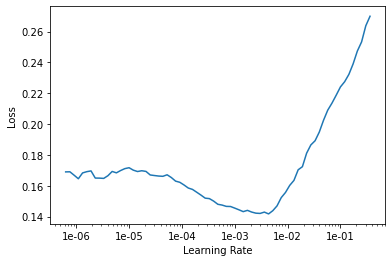

In [91]:
learn.load('stage-4')
learn.lr_find()
learn.recorder.plot()

In [90]:
learn.load('stage-4')
learn.fit_one_cycle(10, slice(1e-5, 5e-2))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.149621,0.451430,0.894643,0.812730,00:00
1,0.144126,0.497073,0.891071,0.771711,00:00
2,0.154707,0.770690,0.873214,0.736710,00:00
3,0.180927,0.918714,0.873214,0.750591,00:00
4,0.192637,1.353051,0.862500,0.741227,00:00
5,0.191271,1.656805,0.867857,0.714394,00:00
6,0.193722,1.487037,0.857143,0.718118,00:00
7,0.189063,1.421804,0.855357,0.718880,00:00
8,0.186994,1.228377,0.860714,0.735054,00:00
9,0.183147,1.039468,0.862500,0.732196,00:00
